## <font color='blue'>Midterm Exam</font> 

### <font color='black'>Group 3: Appliances</font> 
<font color='black'>Bartolome, Sofia Bartolome</font> <br/>
<font color='black'>Caragay, John Russell</font> <br/>
<font color='black'>Escabarte, Karen</font> <br/>
<font color='black'>Odvina, Christian</font> <br/>

<hr style="height:2px;border:5px solid black;"></hr>

#### Importing Necessary Libraries 

In [1]:
import pandas as pd
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

#### Returning All Properties and Methods in the Folder

In [2]:
dir =  'C:/Users/Russell Caragay/COE 004 - INFERENTIAL THINKING/Midterm Exam/Appliance'

#### Getting the Images in the Folder and Using cv2 for Checking

In [3]:
categories = ['Electric Fans','Refrigerators']
for category in categories:
    path = os.path.join(dir,category) 
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        appliance_img = cv2.imread(imgpath,0)
        cv2.imshow('image',appliance_img)
        break
    break

#Reading the first Image
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Appending the properties of the images

In [4]:
categories = ['Electric Fans','Refrigerators']
data = []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category) 
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        appliance_img = cv2.imread(imgpath,0)
        try:
            appliance_img = cv2.resize(appliance_img,(50,50))
            image = np.array(appliance_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass

#Checking the number of Images in the data
print(len(data))

200


In [5]:
#Checking the data, 0 = Electric Fan, 1 = Refrigerator
data

[[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([ 58,  69,  65, ..., 102, 102,  95], dtype=uint8), 0],
 [array([11,  4,  4, ..., 75, 93, 91], dtype=uint8), 0],
 [array([251, 254, 254, ...,  34,  31,  29], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([130,  99,  45, ..., 114, 113, 113], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([252, 252, 252, ..., 252, 252, 252], dtype=uint8), 0],
 [array([ 19,  21,  18, ..., 255, 254, 253], dtype=uint8), 0],
 [array([110, 110, 114, ..., 169, 178, 173], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0]

#### Creating the Pickle File

In [6]:
#Setting the pickle file to write mode
pick_in = open('Group3_APPLIANCE_DATASET.pickle','wb')
#Writting/Adding the data to the pickle file
pickle.dump(data,pick_in)
pick_in.close()

In [7]:
#Reading the pickle file
pick_out = open('Group3_APPLIANCE_DATASET.pickle','rb')
mydata = pickle.load(pick_out)
pick_out.close()

In [8]:
#Loading the pickle file
mydata

[[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([ 58,  69,  65, ..., 102, 102,  95], dtype=uint8), 0],
 [array([11,  4,  4, ..., 75, 93, 91], dtype=uint8), 0],
 [array([251, 254, 254, ...,  34,  31,  29], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([130,  99,  45, ..., 114, 113, 113], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([252, 252, 252, ..., 252, 252, 252], dtype=uint8), 0],
 [array([ 19,  21,  18, ..., 255, 254, 253], dtype=uint8), 0],
 [array([110, 110, 114, ..., 169, 178, 173], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0],
 [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0]

#### Extracting the Features and Labels of the Dataset

In [9]:
import random

random.shuffle(mydata)
features = []
labels = []

for feature, label in mydata:
    features.append(feature)
    labels.append(label)

#### Training the 20% of the Dataset

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

xtrain, xtest, ytrain, ytest = train_test_split(features,labels,test_size=0.20)
model = SVC(C=1, kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [11]:
#Creating the code for getting the accuracy and prediction of the images
categories = ['Electric Fan','Refrigerator']
prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)

#### Testing Images from the Folder

The Accuracy of this prediction is:  0.95
The Prediction for the image is:  Electric Fan


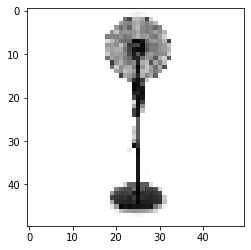

In [12]:
print('The Accuracy of this prediction is: ',accuracy)
print('The Prediction for the image is: ',categories[prediction[5]])

appliance = xtest[5].reshape(50,50)
plt.imshow(appliance,cmap='gray')
plt.show()

The Accuracy of this prediction is:  0.95
The Prediction for the image is:  Refrigerator


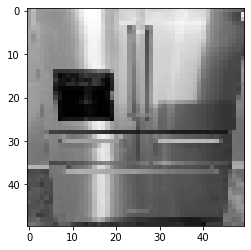

In [13]:
print('The Accuracy of this prediction is: ',accuracy)
print('The Prediction for the image is: ',categories[prediction[12]])

appliance = xtest[12].reshape(50,50)
plt.imshow(appliance,cmap='gray')
plt.show()

The Accuracy of this prediction is:  0.95
The Prediction for the image is:  Refrigerator


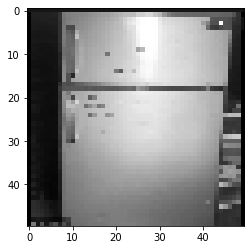

In [14]:
print('The Accuracy of this prediction is: ',accuracy)
print('The Prediction for the image is: ',categories[prediction[30]])

appliance = xtest[30].reshape(50,50)
plt.imshow(appliance,cmap='gray')
plt.show()

In [15]:
len(prediction)

40

#### Testing New Images

##### Test 1

Prediction is:  Electric Fan


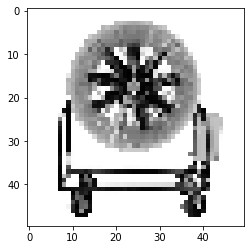

In [16]:
categories = ['Electric Fan','Refrigerator']
appliance_img1 = cv2.imread('C:/Users/Russell Caragay/COE 004 - INFERENTIAL THINKING/Midterm Exam/test1.jpg',0)
appliance_img1 = cv2.resize(appliance_img1,(50,50))
appliance_img1 = np.array(appliance_img1).flatten()
appliance_img1 = appliance_img1.reshape(1, -1)
pred1 = model.predict(appliance_img1)
print('Prediction is: ',categories[pred1[0]])
   

appliancepred1 = appliance_img1.reshape(50,50)
plt.imshow(appliancepred1,cmap='gray')
plt.show()

##### Test 2

Prediction is:  Electric Fan


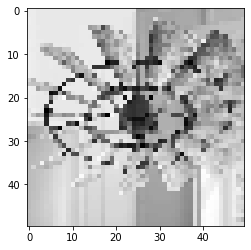

In [17]:
categories = ['Electric Fan','Refrigerator']
appliance_img2 = cv2.imread('C:/Users/Russell Caragay/COE 004 - INFERENTIAL THINKING/Midterm Exam/test2.jpg',0)
appliance_img2 = cv2.resize(appliance_img2,(50,50))
appliance_img2 = np.array(appliance_img2).flatten()
appliance_img2 = appliance_img2.reshape(1, -1)
pred2 = model.predict(appliance_img2)
print('Prediction is: ',categories[pred2[0]])
   

appliancepred2 = appliance_img2.reshape(50,50)
plt.imshow(appliancepred2,cmap='gray')
plt.show()

##### Test 3

Prediction is:  Refrigerator


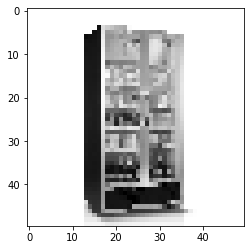

In [18]:
categories = ['Electric Fan','Refrigerator']
appliance_img3 = cv2.imread('C:/Users/Russell Caragay/COE 004 - INFERENTIAL THINKING/Midterm Exam/test3.jpg',0)
appliance_img3 = cv2.resize(appliance_img3,(50,50))
appliance_img3 = np.array(appliance_img3).flatten()
appliance_img3 = appliance_img3.reshape(1, -1)
pred3 = model.predict(appliance_img3)
print('Prediction is: ',categories[pred3[0]])
   

appliancepred3 = appliance_img3.reshape(50,50)
plt.imshow(appliancepred3,cmap='gray')
plt.show()

##### Test 4

Prediction is:  Refrigerator


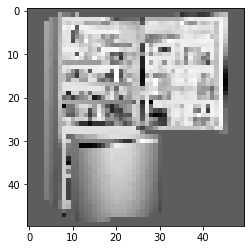

In [19]:
categories = ['Electric Fan','Refrigerator']
appliance_img4 = cv2.imread('C:/Users/Russell Caragay/COE 004 - INFERENTIAL THINKING/Midterm Exam/test4.jpg',0)
appliance_img4 = cv2.resize(appliance_img4,(50,50))
appliance_img4 = np.array(appliance_img4).flatten()
appliance_img4 = appliance_img4.reshape(1, -1)
pred4 = model.predict(appliance_img4)
print('Prediction is: ',categories[pred4[0]])
   

appliancepred4 = appliance_img4.reshape(50,50)
plt.imshow(appliancepred4,cmap='gray')
plt.show()

#### Creating the Model

In [20]:
#Creating and setting the model in writing mode
pick = open('Group3_Appliances_Model.sav','wb')
#Adding the model to the model file
pickle.dump(model,pick)
pick.close()

In [21]:
#Reading the Model
pick = open('Group3_Appliances_Model.sav','rb')
model = pickle.load(pick)
pick.close()